# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1003]:
# 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1006]:
import pandas as pd

In [1008]:
df = pd.read_csv('/Users/stefan/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [1010]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [1013]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df.dropna()
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1015]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1017]:
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


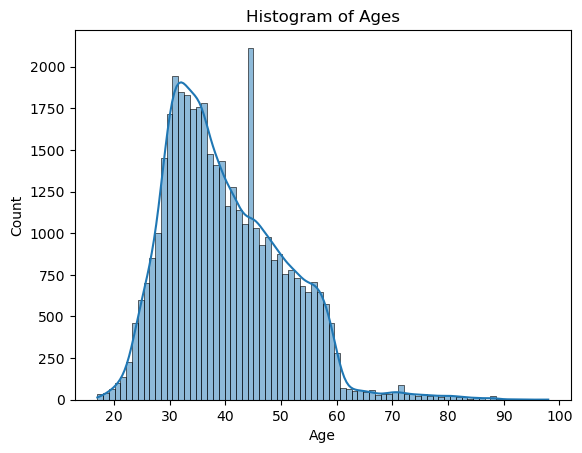

age
41    1278
42    1142
43    1055
44    1011
45    1103
46    1030
47     928
48     979
49     839
Name: count, dtype: int64


In [1019]:
# histogram of ages
plt.figure()
sns.histplot(df['age'], bins=len(df['age'].unique()), kde=True)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# why are there so many 45 year olds appearing on this chart?
print(df[ (df['age'] > 40) & (df['age'] < 50) ]['age'].value_counts().sort_index())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


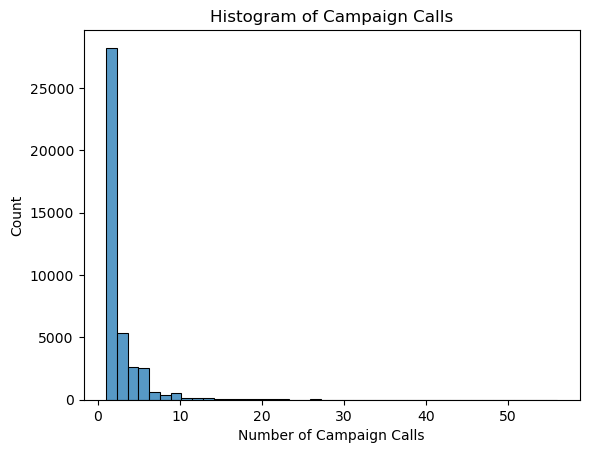

In [1021]:
# histogram of campaign
plt.figure()
sns.histplot(df['campaign'], bins=len(df['campaign'].unique()))
plt.title('Histogram of Campaign Calls')
plt.xlabel('Number of Campaign Calls')
plt.ylabel('Count')
plt.show()
# this looks like it could be potentially be linear on a log scale

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


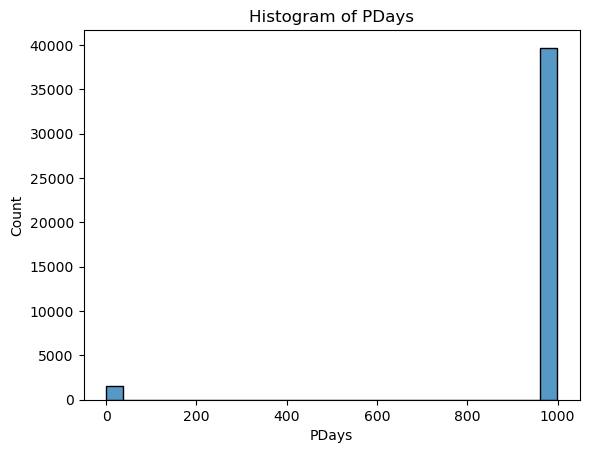

In [1023]:
# histogram of pdays (days since previous call)
#print(df['pdays'].value_counts())

plt.figure()
sns.histplot(df['pdays'], bins=len(df['pdays'].unique()))
plt.title('Histogram of PDays')
plt.xlabel('PDays')
plt.ylabel('Count')
plt.show()
# this is an odd distribution - the 999 values represent never contacted,
# and they make up the majority of the set. I think it might throw off any
# ability for us to use predictive mathematics, so it might be more useful
# to us if we reset the 999's to 0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


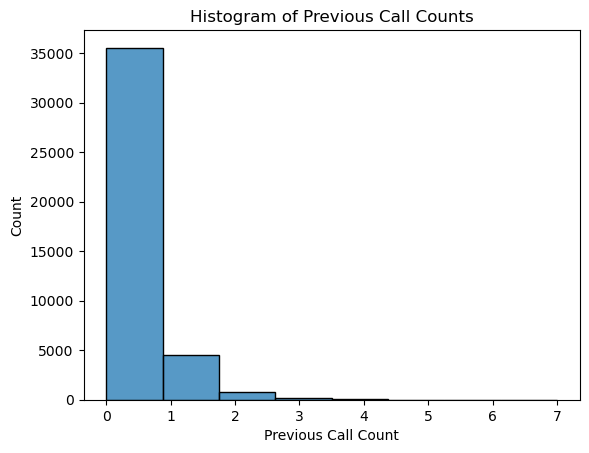

In [1025]:
# histogram of days since previous call
plt.figure()
sns.histplot(df['previous'], bins=len(df['previous'].unique()))
plt.title('Histogram of Previous Call Counts')
plt.xlabel('Previous Call Count')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


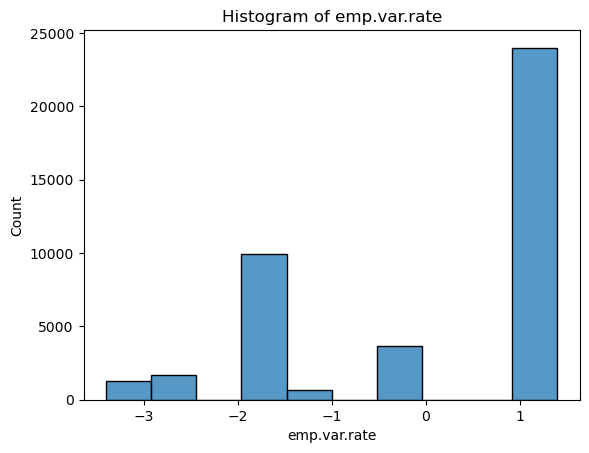

In [1027]:
# histogram of emp.var.rate
#print(df['emp.var.rate'].unique())
plt.figure()
sns.histplot(df['emp.var.rate'], bins=len(df['emp.var.rate'].unique()))
plt.title('Histogram of emp.var.rate')
plt.xlabel('emp.var.rate')
plt.ylabel('Count')
plt.show()
# this looks like it has the potential to be seasonal
# it might be out of scope for this assignment but using
# a model with periodicity might actually be a good improvement later on

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


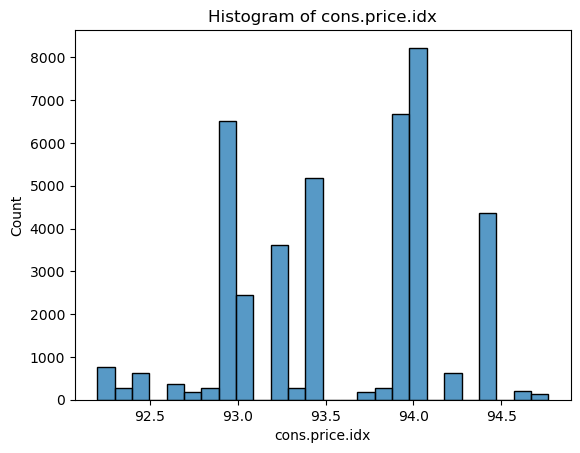

In [1029]:
# histogram of cons.price.idx
plt.figure()
sns.histplot(df['cons.price.idx'], bins=len(df['cons.price.idx'].unique()))
plt.title('Histogram of cons.price.idx')
plt.xlabel('cons.price.idx')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


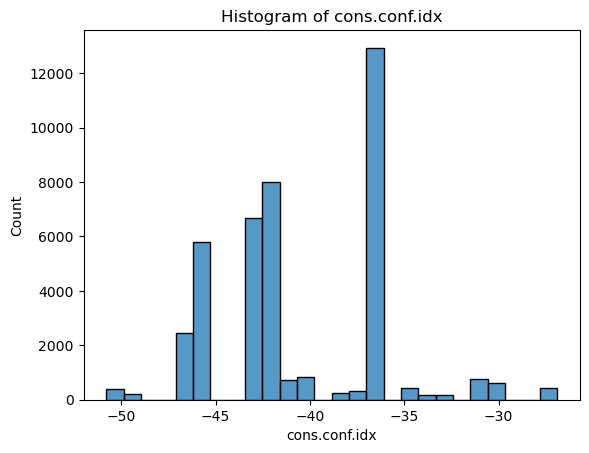

In [1031]:
# histogram of cons.conf.idx
plt.figure()
sns.histplot(df['cons.conf.idx'], bins=len(df['cons.conf.idx'].unique()))
plt.title('Histogram of cons.conf.idx')
plt.xlabel('cons.conf.idx')
plt.ylabel('Count')
plt.show()
# another one that looks like it might have seasonality to it

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


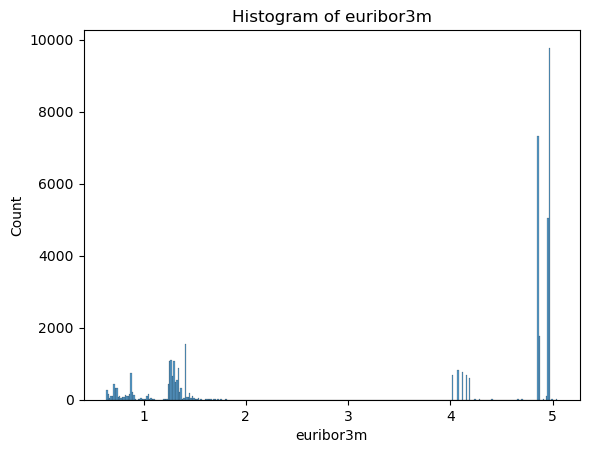

In [1033]:
# histogram of euribor3m
plt.figure()
sns.histplot(df['euribor3m'], bins=len(df['euribor3m'].unique()))
plt.title('Histogram of euribor3m')
plt.xlabel('euribor3m')
plt.ylabel('Count')
plt.show()
# possible seasonality

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


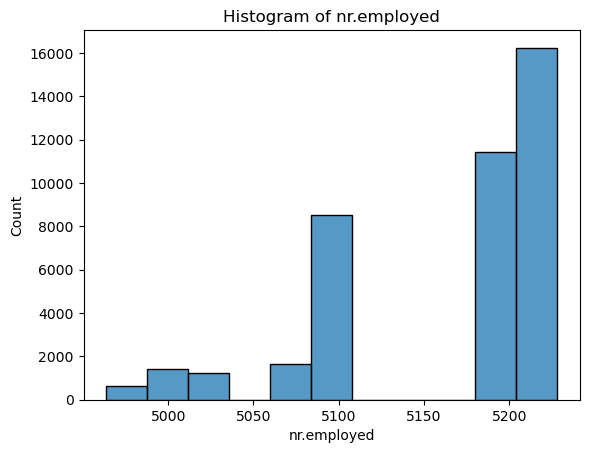

In [1035]:
# histogram of nr.employed
plt.figure()
sns.histplot(df['nr.employed'], bins=len(df['nr.employed'].unique()))
plt.title('Histogram of nr.employed')
plt.xlabel('nr.employed')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


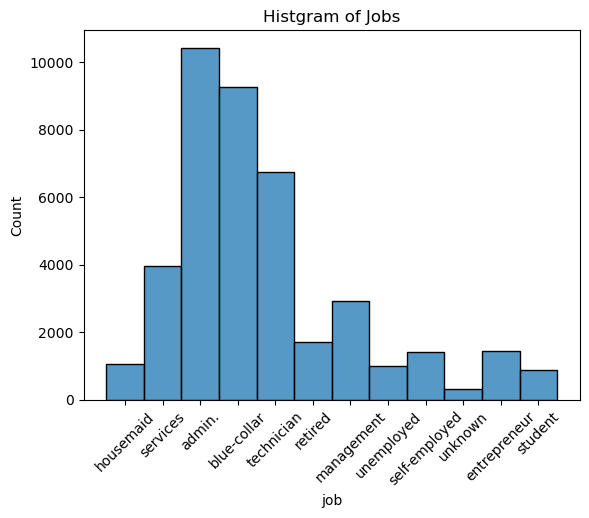

In [1037]:
plt.figure()
sns.histplot(df['job'])
plt.title('Histgram of Jobs')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


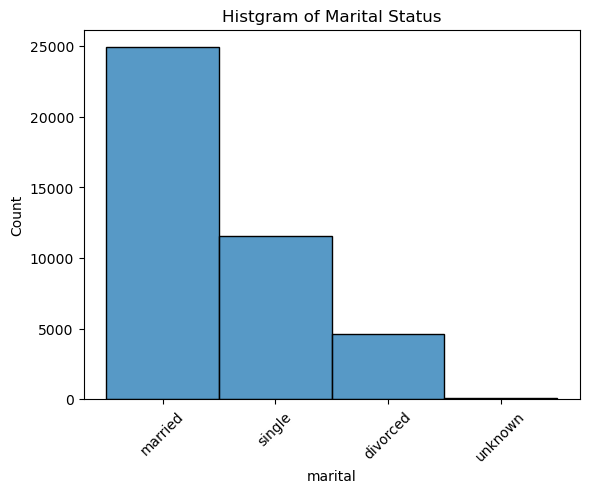

In [1039]:
plt.figure()
sns.histplot(df['marital'])
plt.title('Histgram of Marital Status')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


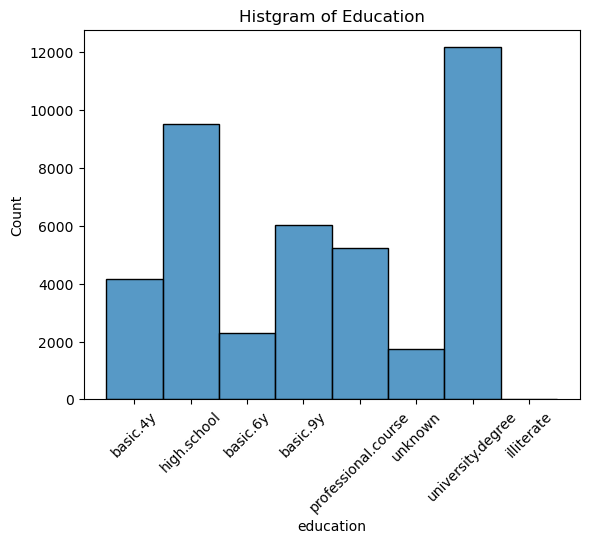

In [1041]:
plt.figure()
sns.histplot(df['education'])
plt.title('Histgram of Education')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


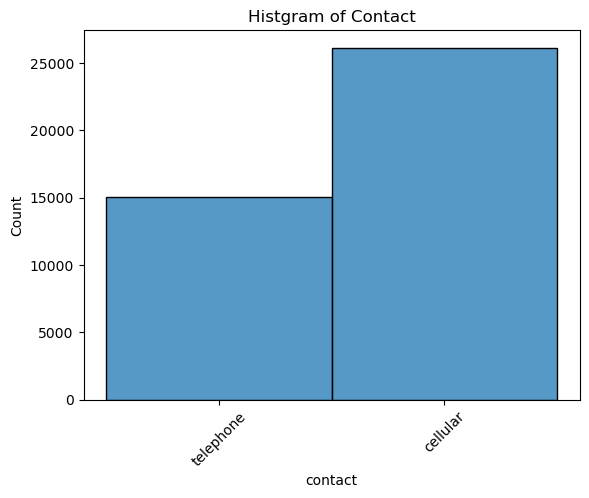

In [1043]:
plt.figure()
sns.histplot(df['contact'])
plt.title('Histgram of Contact')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


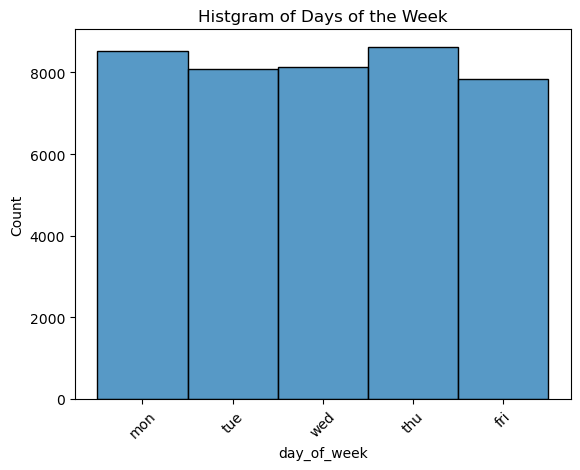

In [1045]:
plt.figure()
sns.histplot(df['day_of_week'])
plt.title('Histgram of Days of the Week')
plt.xticks(rotation=45)
plt.show()

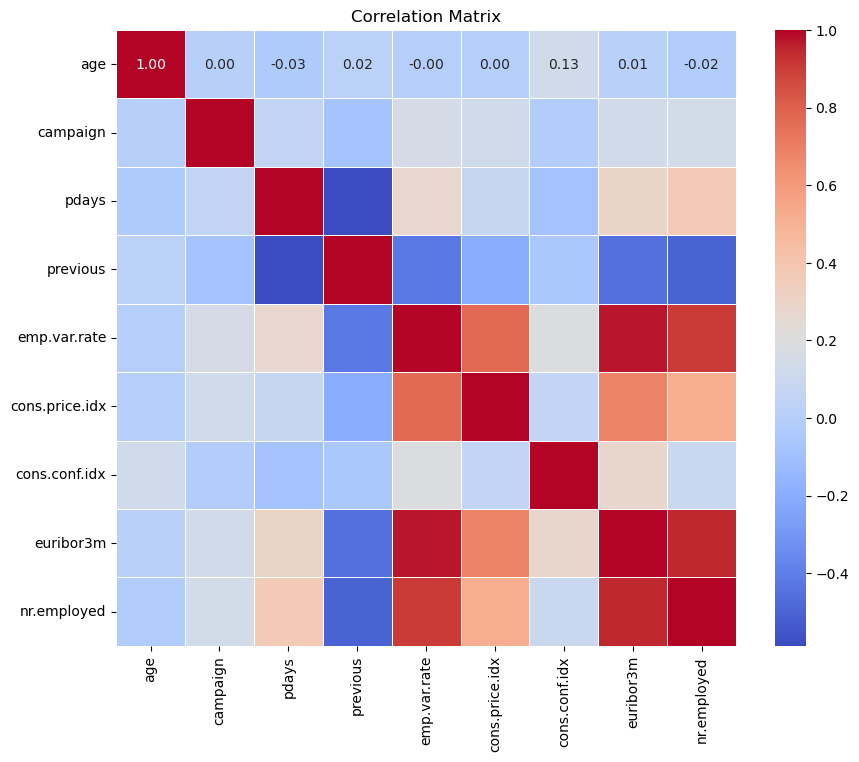

In [1047]:
# correlation matrix for the numerical columns
num_cols = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_nums = df[num_cols]
plt.figure(figsize=(10, 8))
corr_matrix = df_nums.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# we can see at a glance that campaign, cons.conf.idx, and pdays do not have
# terribly strong correlations with anything other than themselves

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [1050]:
###
### The Business Objective:
###

# The objective of this exercise is to compare several machine learning models (KNN, SVM, Decision Trees) in
# order to determine their relative effectiveness at predicting whether a customers will or will not subscribe
# a term deposit using the given dataset.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [868]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [870]:
# according the notes in the data description 'duration' should be excluded from the predictive features
df = df.drop('duration', axis=1)

In [878]:
# convert pdays to 0 where pdays = 999 (not previously contacted)
df.loc[ df['pdays'] == 999, 'pdays' ] = 0
#print(df[ df['pdays'] == 0 ])

In [880]:
# encode categorical features
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [985]:
# scale the numerical features
numerical_cols = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X_scaled = StandardScaler().fit_transform(df[numerical_cols])

In [884]:
# rename 'y' to 'subscribed' and transform into 1/0 (T/F)
df_encoded['subscribed'] = LabelEncoder().fit_transform(df_encoded['y'])
df_encoded = df_encoded.drop('y', axis=1)
# print(df_encoded)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [887]:
from sklearn.model_selection import train_test_split

In [955]:
# Split into training and testing sets
X = df_encoded.drop('subscribed', axis=1) # everything but y
y = df_encoded['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [893]:
# get the proportion of subscribed=yes to total
baseline_proportions = df_encoded['subscribed'].value_counts(normalize=True)
baseline_performance = baseline_proportions[0] / (baseline_proportions[0] + baseline_proportions[1])
print(f"Baseline Performance: {baseline_performance}")

Baseline Performance: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [898]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [901]:
from sklearn.metrics import accuracy_score

lr_accuracy_train = accuracy_score(y_train, lr_model.predict(X_train))
lr_accuracy_test = accuracy_score(y_test, lr_model.predict(X_test))

print(f"Logistic Regression Train Accuracy: {lr_accuracy_train}")
print(f"Logistic Regression Test Accuracy: {lr_accuracy_test}")

Logistic Regression Train Accuracy: 0.8971221391343757
Logistic Regression Test Accuracy: 0.8961833543750607


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [904]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

In [906]:
# try KNearestNeighborsClassifier - start with n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_t0 = time.perf_counter()
knn_model.fit(X_train, y_train)
knn_t1 = time.perf_counter()
knn_accuracy_train = accuracy_score(y_train, knn_model.predict(X_train))
knn_accuracy_test = accuracy_score(y_test, knn_model.predict(X_test))
knn_fit_time = knn_t1 - knn_t0

print(f"K-Nearest Neighbors Train Accuracy: {knn_accuracy_train}")
print(f"K-Nearest Neighbors Test Accuracy: {knn_accuracy_test}")
print(f"K-Nearest Neighbors Fit time: {knn_fit_time}")

K-Nearest Neighbors Train Accuracy: 0.9129519924897219
K-Nearest Neighbors Test Accuracy: 0.891133339807711
K-Nearest Neighbors Fit time: 0.029781792080029845


In [908]:
# Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_t0 = time.perf_counter()
dt_model.fit(X_train, y_train)
dt_t1 = time.perf_counter()
dt_accuracy_train = accuracy_score(y_train, dt_model.predict(X_train))
dt_accuracy_test = accuracy_score(y_test, dt_model.predict(X_test))
dt_fit_time = dt_t1 - dt_t0

print(f"Decision Tree Train Accuracy: {dt_accuracy_train}")
print(f"Decision Tree Test Accuracy: {dt_accuracy_test}")
print(f"Decision Tree Fit Time: {dt_fit_time}")

Decision Tree Train Accuracy: 0.9565569259654916
Decision Tree Test Accuracy: 0.8758861804409052
Decision Tree Fit Time: 0.07550608296878636


In [910]:
# SVM
svc_model = SVC()
svc_t0 = time.perf_counter()
svc_model.fit(X_train, y_train)
svc_t1 = time.perf_counter()
svc_accuracy_train = accuracy_score(y_train, svc_model.predict(X_train))
svc_accuracy_test = accuracy_score(y_test, svc_model.predict(X_test))
svc_fit_time = svc_t1 - svc_t0

print(f"SVC Train Accuracy: {svc_accuracy_train}")
print(f"SVC Test Accuracy: {svc_accuracy_test}")
print(f"SVC Fit Time: {svc_fit_time}")

SVC Train Accuracy: 0.9011362532776537
SVC Test Accuracy: 0.898902592988249
SVC Fit Time: 6.468408208107576


In [912]:
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree Classifier', 'SVM'],
    'Train Time': [knn_fit_time, dt_fit_time, svc_fit_time],
    'Train Accuracy': [knn_accuracy_train, dt_accuracy_train, svc_accuracy_train],
    'Test Accuracy': [knn_accuracy_test, dt_accuracy_test, svc_accuracy_test]
}).set_index('Model')
print(results)

                          Train Time  Train Accuracy  Test Accuracy
Model                                                              
KNN                         0.029782        0.912952       0.891133
Decision Tree Classifier    0.075506        0.956557       0.875886
SVM                         6.468408        0.901136       0.898903


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [915]:
from sklearn.model_selection import GridSearchCV

In [919]:
# apply GridSearchCV to KNN - try different n_neighbors from 1-10
knn_grid_search_params = {
    'n_neighbors':[i for i in range(1,11)],
}
knn_model_opt = GridSearchCV(knn_model, param_grid=knn_grid_search_params)
knn_model_opt.fit(X_train, y_train)

#print(knn_model_search.best_params_)
knn_best_n_neighbors = knn_model_opt.best_params_['n_neighbors']

knn_opt_accuracy_train = accuracy_score(y_train, knn_model_opt.predict(X_train))
knn_opt_accuracy_test = accuracy_score(y_test, knn_model_opt.predict(X_test))

print(f"Optimized KNN Train Accuracy (n_neighbors={knn_best_n_neighbors}): {knn_opt_accuracy_train} (previous: {knn_accuracy_train})")
print(f"Optimized KNN Test Accuracy (n_neighbors={knn_best_n_neighbors}): {knn_opt_accuracy_test} (previous: {knn_accuracy_test})")

Optimized KNN Train Accuracy (n_neighbors=10): 0.9050856236444271 (previous: 0.9129519924897219)
Optimized KNN Test Accuracy (n_neighbors=10): 0.8957948917160338 (previous: 0.891133339807711)


In [921]:
# We can get a slight improvement in our KNN model by increasing the n_neighbors to 10.
# We could try higher numbers as well.

In [923]:
# apply GridSearchCV to SVM
svc_grid_search_params = {
    'C': [0.1,0.5,1.0]
}
svc_model_opt = GridSearchCV(svc_model, param_grid=svc_grid_search_params)
svc_model_opt.fit(X_train, y_train)

svc_best_c = svc_model_opt.best_params_['C']

svc_opt_accuracy_train = accuracy_score(y_train, svc_model_opt.predict(X_train))
svc_opt_accuracy_test = accuracy_score(y_test, svc_model_opt.predict(X_test))

print(f"Optimized SVM Train Accuracy (C={svc_best_c}): {svc_opt_accuracy_train} (previous: {svc_accuracy_train})")
print(f"Optimized SVM Test Accuracy (C={svc_best_c}): {svc_opt_accuracy_test} (previous: {svc_accuracy_test})")

Optimized SVM Train Accuracy (C=0.5): 0.9005535592891133 (previous: 0.9011362532776537)
Optimized SVM Test Accuracy (C=0.5): 0.8984170146644653 (previous: 0.898902592988249)


In [924]:
# the default parameters are working as well as any

In [987]:
# try some optimization on the Decision Tree Classifier
dt_grid_search_params = {
    'max_depth': [i for i in range(1,11)],
    'min_samples_split': [2,5,10],
    'max_features': [3,5,10]
}
dt_model_opt = GridSearchCV(dt_model, param_grid=dt_grid_search_params)
dt_model_opt.fit(X_train, y_train)

#print(dt_model_opt.feature_importances_)

dt_best_max_depth = dt_model_opt.best_params_['max_depth']
dt_best_max_features = dt_model_opt.best_params_['max_features']

dt_opt_accuracy_train = accuracy_score(y_train, dt_model_opt.predict(X_train))
dt_opt_accuracy_test = accuracy_score(y_test, dt_model_opt.predict(X_test))

print(f"Optimized Decision Tree Train Accuracy (max_depth={dt_best_max_depth} max_features={dt_best_max_features}): {dt_opt_accuracy_train} (previous: {dt_accuracy_train})")
print(f"Optimized Decision Tree Test Accuracy (max_depth={dt_best_max_depth} max_features={dt_best_max_features}): {dt_opt_accuracy_test} (previous: {dt_accuracy_test})")

Optimized Decision Tree Train Accuracy (max_depth=2 max_features=10): 0.8984493865527177 (previous: 0.9565569259654916)
Optimized Decision Tree Test Accuracy (max_depth=2 max_features=10): 0.9022045255899777 (previous: 0.8758861804409052)


In [989]:
# Once again we tune the max_depth and max_features params to get some minor improvements in the test accuracy

##### Questions